In [ ]:
import numpy as np
import pandas as pd

# 1.Mathematics & Statistics Assignment

### numpy

In [ ]:
# via numpy
arr=np.array([78,82,90,75,88,92,85,79,81,87])

print(" Mean of scores : ",np.mean(arr))
print(" Median of scores : ",np.median(arr))
val,counts=np.unique(arr,return_counts=True)
ind=np.argmax(counts)
print(" Mode of scores : ",val[ind])

 Mean of scores :  83.7
 Median of scores :  83.5
 Mode of scores :  75


In [ ]:
# Dispersion Measures:
print(" Variance of scores : ",np.var(arr))
print(" Standard Deviation of scores : ",np.std(arr))

 Variance of scores :  28.01
 Standard Deviation of scores :  5.292447448959697


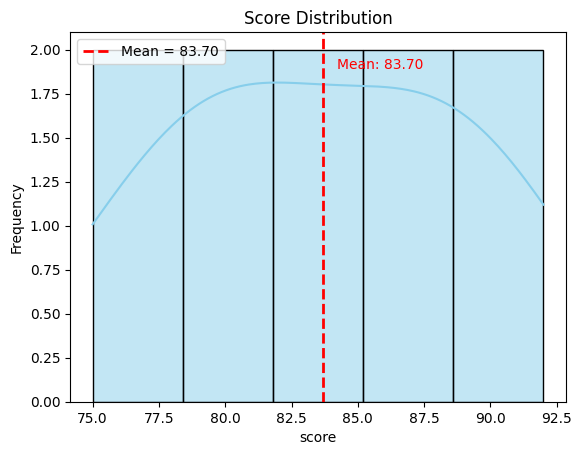

Scores are Tightly Clustered around Mean and Normally Distributed


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Data
scores = [78, 82, 90, 75, 88, 92, 85, 79, 81, 87]
df = pd.DataFrame({'score': scores})

mean = np.mean(scores)
std = np.std(scores)


sns.histplot(df['score'], bins=5, kde=True, color='skyblue')

plt.axvline(mean, color='red', linestyle='--', linewidth=2, label=f'Mean = {mean:.2f}')
plt.text(mean + 0.5, plt.ylim()[1]*0.9, f'Mean: {mean:.2f}', color='red')


plt.ylabel('Frequency')
plt.title('Score Distribution')
plt.legend()
plt.show()

if std < 10:
    print("Scores are Tightly Clustered around Mean and Normally Distributed")
else:
    print("Scores are not Tightly Clustered around Mean and Normally Distributed")


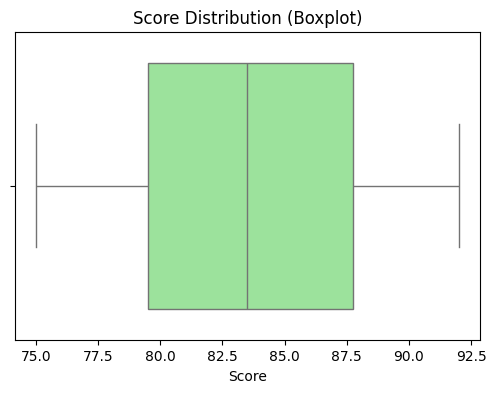

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
data={'score':[78,82,90,75,88,92,85,79,81,87]}
std_id=[1,2,3,4,5,6,7,8,9,10]
df=pd.DataFrame(data,index=std_id)
df.index.name='student id'
df.rename(columns={'score':'Score (out of 100)'},inplace=True)
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Score (out of 100)', color='lightgreen')
plt.title('Score Distribution (Boxplot)')
plt.xlabel('Score')
plt.show()

### pandas

In [ ]:
data={'score':[78,82,90,75,88,92,85,79,81,87]}
std_id=[1,2,3,4,5,6,7,8,9,10]
df=pd.DataFrame(data,index=std_id)
df.index.name='student id'
df.rename(columns={'score':'Score (out of 100)'},inplace=True)




In [ ]:
df.head()

,Score (out of 100)
student id,
1,78
2,82
3,90
4,75
5,88


In [ ]:
print(' Mean of scores : ',df['Score (out of 100)'].mean())
print(' Median of scores : ',df['Score (out of 100)'].median())
# to eliminate multi modes
print(' Mode of scores : ',df['Score (out of 100)'].mode()[0])


 Mean of scores :  83.7
 Median of scores :  83.5
 Mode of scores :  75


# 2.Probab & bayes

In [ ]:
import pandas as pd

# Create the DataFrame
data = {
    'Email ID': [1,2,3,4,5,6,7,8,9,10],
    'Contains Offer': [1,0,1,0,1,0,1,0,1,0],
    'Length > 100': [0,1,1,0,1,1,0,0,1,0],
    'Spam': [1,0,1,0,1,0,1,0,1,0]
}

df = pd.DataFrame(data)
def count_1(df, column_name):
    count = df[column_name].value_counts().get(1)
    return count
print('probability of email is spam :',count_1(df,'Spam')/df['Spam'].count())
print('probability of email contains offer :',count_1(df,'Contains Offer')/df['Contains Offer'].count())
print('probability of email length > 100 :',count_1(df,'Length > 100')/df['Length > 100'].count())

probability of email is spam : 0.5
probability of email contains offer : 0.5
probability of email length > 100 : 0.5


In [ ]:
# conditional probab
def probab(df,col1):
  c=df[col1].value_counts().get(1,0) # 0 is for default
  return c/df[col1].count()

def cond_prob(df, col1 , col2):
  inter=0
  intersection = df[(df[col1] == 1) & (df[col2] == 1)].shape[0]
  condition_count = df[df[col1] == 1].shape[0]
  return intersection/condition_count


  return inter/probab(df,col2)

print('Given that email contains Offer, probability that it is spam is : ',cond_prob(df,'Contains Offer','Spam'))

# bayes theorm
print('Given that email is spam, probability that it contains offer is : ',cond_prob(df,'Contains Offer','Spam')*probab(df,'Spam')/probab(df,'Contains Offer'))

print(' verify : ',cond_prob(df,'Spam','Contains Offer'))


Given that email contains Offer, probability that it is spam is :  1.0
Given that email is spam, probability that it contains offer is :  1.0
 verify :  1.0


# Hypothesis Testing

In [ ]:
import pandas as pd


data = {
    "Product ID": list(range(1, 11)),
    "Weight (Batch A, in grams)": [500, 498, 502, 501, 497, 499, 503, 500, 498, 502],
    "Weight (Batch B, in grams)": [495, 497, 496, 495, 494, 495, 493, 495, 496, 494]
}

df = pd.DataFrame(data)

sample_mean = df["Weight (Batch A, in grams)"].mean()
sample_std = df["Weight (Batch A, in grams)"].std()
sample_size=df['Weight (Batch A, in grams)'].count()
# mue
null_hypothesis = 500
alt=!null_hypothesis
print('sample_mean =',sample_mean)
print('sample_std =', sample_std)
print('sample_size =', sample_size)
print('null_hypothesis =', null_hypothesis)
print('Alternate hypthosesis =',alt )
z= (sample_mean- null_hypothesis) / (sample_std / (pow(sample_size,0.5)))
print('z :',z)


sample_mean = 500.0
sample_std = 2.0
sample_size = 10
null_hypothesis = 500
Alternate hypthosesis = ['/bin/bash: line 1: null_hypothesis: command not found']
z : 0.0


In [ ]:
from scipy.stats import norm

p = 2 * (1 - norm.cdf(abs(z)))

alpha = 5/100
print('p-value =', p)
print('alpha =', alpha)
if p > alpha:
  print(' we fail to reject null hypothesis')
  print(' so the Batch A is not significantly different from 500 gms')
else:
  print(' we reject null hypothesis ')

p-value = 1.0
alpha = 0.05
 we fail to reject null hypothesis
 so the Batch A is not significantly different from 500 gms


In [ ]:
from scipy import stats

df["Difference (A - B)"] = df["Weight (Batch A, in grams)"] - df["Weight (Batch B, in grams)"]

t_statistic, p_value = stats.ttest_rel(
    df["Weight (Batch A, in grams)"],
    df["Weight (Batch B, in grams)"]
)

print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("Result: The difference is statistically significant (reject H0).")
else:
    print("Result: The difference is NOT statistically significant (fail to reject H0).")


T-statistic: 5.8387
P-value: 0.0002
Result: The difference is statistically significant (reject H0).


# Batch A is on target with 500g.

# Batch B is consistently lighter than Batch A.

# This suggests process drift or variation in production for Batch B that may need investigation.

# linear algebra assign

In [ ]:
import numpy as np

A = np.array([[2, 3],
              [4, -1]])
B = np.array([[8],
              [2]])
det_A = np.linalg.det(A)
print("Determinant of A:", det_A)
if det_A != 0:
    print("Matrix A is invertible.")
    A_inv = np.linalg.inv(A)
    print("Inverse of A:\n", A_inv)
    x = np.matmul(A_inv, B)
    print("Solution (x and y):\n", x)
else:
    print("Matrix A is not invertible.")


Determinant of A: -14.000000000000004
Matrix A is invertible.
Inverse of A:
 [[ 0.07142857  0.21428571]
 [ 0.28571429 -0.14285714]]
Solution (x and y):
 [[1.]
 [2.]]


Invertible matrices are required to solve equations y = mx + c

They ensure a unique and stable solution for model parameters.

Without invertibility, regression can't be solved using the normal equation.

Non-invertibility happens due to duplicate features, high correlation, or more features than samples.

# 5. Intro to Calculus Assignment

In [ ]:
import sympy as sp

x_value=[-2,0,1,2,4,5,6]

def lossfun(x):
  y_value=[i**2 -4*i +5 for i in x]
  return y_value

y_value=lossfun(x_value)

x = sp.Symbol('x')
f = x**2 - 4*x + 5
dervof_f = sp.diff(f, x)
print(dervof_f)

for i in x_value:
  print(f' gradient at {i} : ',dervof_f.subs(x,i))

2*x - 4
 gradient at -2 :  -8
 gradient at 0 :  -4
 gradient at 1 :  -2
 gradient at 2 :  0
 gradient at 4 :  4
 gradient at 5 :  6
 gradient at 6 :  8


## critical point analysis

In [ ]:
for i in x_value:
  if dervof_f.subs(x,i)==0:
    cc=i
    print(f'critical point at {i}')
secderof_f=sp.diff(dervof_f,x)
print('secderof_f : ',secderof_f)
if cc is not None and secderof_f.subs(x,cc)> 0:
  print('function is minimum at critical point')



critical point at 2
secderof_f :  2
function is minimum at critical point


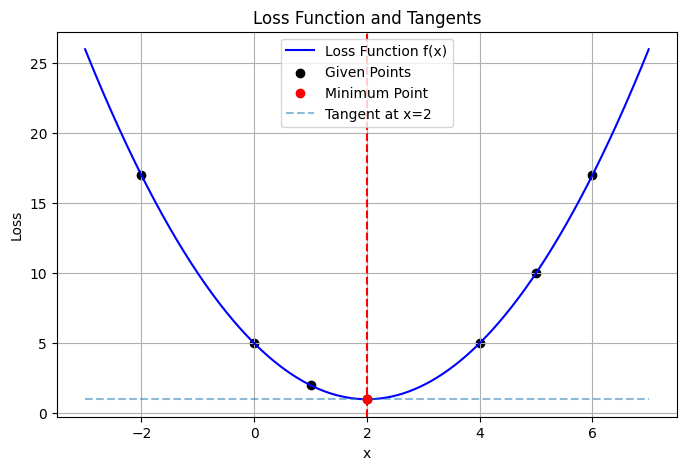

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

f_lamb = sp.lambdify(x, f, modules='numpy')
derv_lamb = sp.lambdify(x, dervof_f, modules='numpy')

x_range = np.linspace(min(x_value)-1, max(x_value)+1, 400)
y_range = f_lamb(x_range)

plt.figure(figsize=(8, 5))
plt.plot(x_range, y_range, label='Loss Function f(x)', color='blue')
plt.scatter(x_value, y_value, color='black', label='Given Points')

plt.scatter(cc, f_lamb(cc), color='red', label='Minimum Point', zorder=5)
plt.axvline(x=cc, color='red', linestyle='--')

for i in [2]:
    slope = derv_lamb(i)
    y_bar = f_lamb(i)
    tangent_line = slope * (x_range - i) + y_bar
    plt.plot(x_range, tangent_line, linestyle='--', alpha=0.5, label=f'Tangent at x={i}')

plt.title("Loss Function and Tangents")
plt.xlabel("x")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()
